In [15]:
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics.cluster import pair_confusion_matrix
import seaborn as sn

<h2>Compute similarity matrices<h2>

The pair confusion matrix  computes a 2 by 2 similarity matrix between two clusterings by considering all pairs of samples and counting pairs that are assigned into the same or into different clusters under the true and predicted clusterings.

Considering a pair of samples that is clustered together a positive pair, then as in binary classification the count of true negatives is C00, false negatives is C10, true positives C11 is  and false positives is C01.

In [16]:
dataset = 'blobs'
configuration = 0

In [17]:
df_assignment_qkmeans = pd.read_csv("result/assignment/" + str(dataset) + "_qkmeans" + "_" + str(configuration) + ".csv", sep=',')
quantum_assignment = df_assignment_qkmeans['cluster']

In [18]:
df_assignment_kmeans = pd.read_csv("result/assignment/" + str(dataset) + "_kmeans" + "_" + str(configuration) + ".csv", sep=',')
classical_assignment = df_assignment_kmeans['cluster']

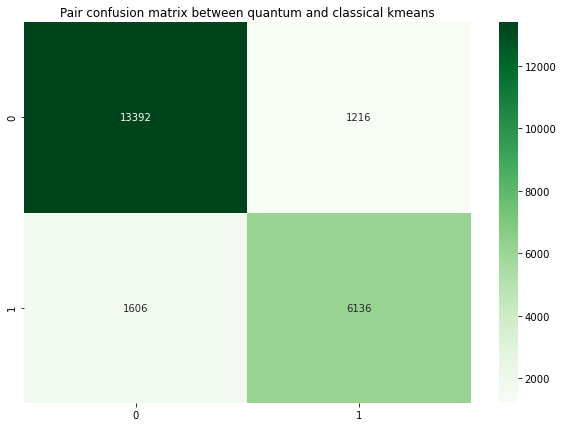

In [28]:
cm = pair_confusion_matrix(quantum_assignment, classical_assignment)
plt.figure(figsize = (10,7))
plt.title("Pair confusion matrix between quantum and classical kmeans")

s = sn.heatmap(cm, annot=True, fmt="d", cmap='Greens')

<h2>Configuration analysis<h2>

In [39]:
dataset = 'blobs'

In [40]:
df_qkmeans = pd.read_csv("result/" + str(dataset) + "_qkmeans.csv", sep=',')

In [41]:
df_kmeans = pd.read_csv("result/" + str(dataset) + "_kmeans.csv", sep=',')

In [42]:
df_deltakmeans = pd.read_csv("result/" + str(dataset) + "_deltakmeans.csv", sep=',')

In [51]:
df_qkmeans[df_qkmeans['SSE']==min(df_qkmeans['SSE'])]

,index,date,K,M,N,M1,shots,n_circuits,max_qbits,n_ite,avg_ite_time,avg_similarity,SSE,silhouette,v_measure,nm_info
1,1,2021-12-18 16:06:12,3,150,2,4,7000,38,9,10,13.26,78.93,9.206,0.675,0.813,0.813


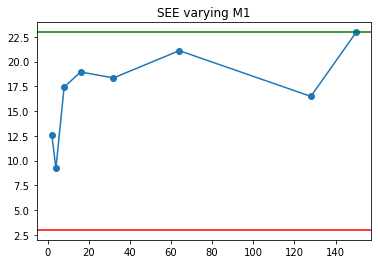

In [61]:
plt.plot(df_qkmeans['M1'],df_qkmeans['SSE'], marker="o")
plt.axhline(y=int(df_kmeans['SSE']), color='r', linestyle='-')
plt.axhline(y=int(df_deltakmeans['SSE']), color='g', linestyle='-')
plt.title("SEE varying M1")
plt.show()

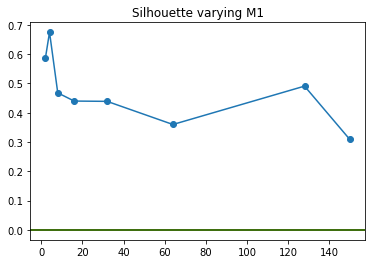

In [62]:
plt.plot(df_qkmeans['M1'],df_qkmeans['silhouette'], marker="o")
plt.axhline(y=int(df_kmeans['silhouette']), color='r', linestyle='-')
plt.axhline(y=int(df_deltakmeans['silhouette']), color='g', linestyle='-')
plt.title("Silhouette varying M1")
plt.show()

<h2>Cluster result<h2>

In [80]:
dataset = 'blobs'
configuration = 0

(-0.5, 999.5, 999.5, -0.5)

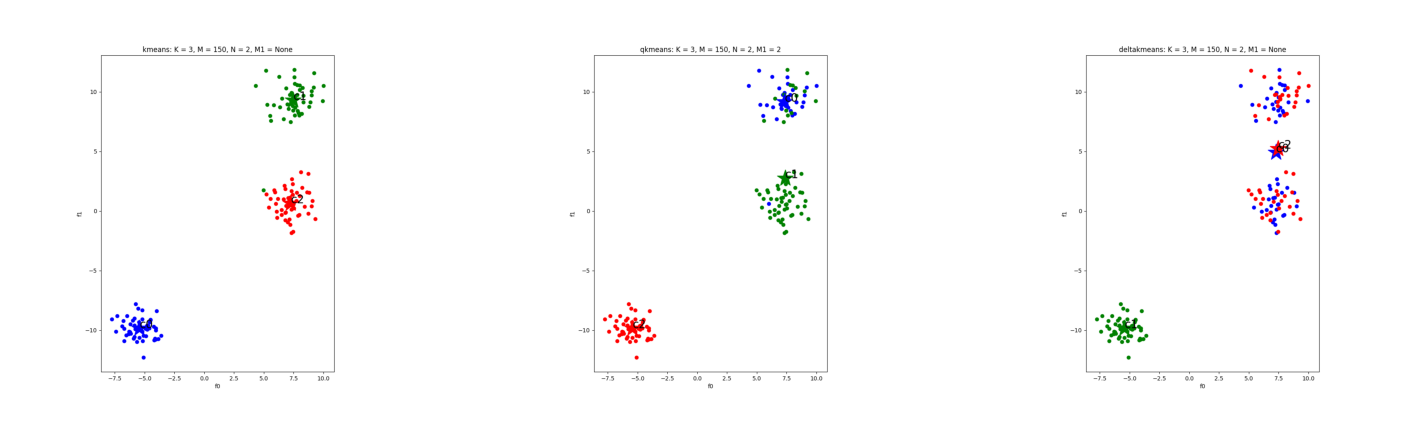

In [90]:
import matplotlib.image as mpimg
from matplotlib import rcParams

image_kmeans = "./plot/cluster/" + str(dataset) + "_kmeans_0.png"
image_deltakmeans = "./plot/cluster/" + str(dataset) + "_deltakmeans_0.png"
image_qkmeans = "./plot/cluster/" + str(dataset) + "_qkmeans_" + str(configuration) + ".png"

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 25 ,25

# read images
img_A = mpimg.imread(image_kmeans)
img_B = mpimg.imread(image_qkmeans)
img_C = mpimg.imread(image_deltakmeans)


fig, ax = plt.subplots(1,3)
ax[0].imshow(img_A)
ax[0].axis('off')
ax[1].imshow(img_B)
ax[1].axis('off')
ax[2].imshow(img_C)
ax[2].axis('off')